### All Imports

In [2]:
import pandas as pd
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


### Hierarchies of stocks

### SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the `normalize()` function from `sklearn.preprocessing` instead of `Normalizer`.


### Load Data

In [14]:
# fn = '../datasets/company-stock-movements-2010-2015-incl.csv'
fn = "data/company-stock-movements-2010-2015-incl.csv"

stocks_df = pd.read_csv(fn, index_col=0) 

companies = list(stocks_df.index)
movements = stocks_df.values
stocks_df

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,-0.379999,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
British American Tobacco,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,-0.150002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,-0.130001,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001
Caterpillar,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,-1.330002,...,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001,0.159996
Colgate-Palmolive,0.360000,0.909996,-0.290001,-0.059998,1.300003,0.510003,1.050003,0.529999,-0.360001,-0.540001,...,0.949997,1.520001,-0.320000,-0.500000,1.080002,0.280002,0.620003,0.359996,1.070003,1.050003


### Normalize Results

In [6]:
movements_normalized = normalize(movements)
movements_normalized

array([[ 0.00302051, -0.00114574, -0.01775851, ..., -0.02791349,
         0.00437463, -0.10202026],
       [-0.02599391, -0.02639998, -0.00852927, ..., -0.00162466,
        -0.01624623,  0.02680614],
       [-0.02208986,  0.01184398, -0.02208986, ...,  0.04502568,
        -0.01654394,  0.03515588],
       ...,
       [ 0.01981027,  0.01059598,  0.02626006, ..., -0.01197837,
         0.01842816,  0.02211388],
       [ 0.0200991 ,  0.00223323, -0.01786587, ..., -0.0066997 ,
         0.00446647, -0.0066997 ],
       [ 0.01796837,  0.00112314,  0.        , ..., -0.00673829,
         0.02919855,  0.01123007]])

In [11]:
mergings = linkage(movements_normalized, method='complete')
mergings

array([[ 42.        ,  49.        ,   0.58499795,   2.        ],
       [ 12.        ,  57.        ,   0.67355098,   2.        ],
       [  5.        ,  26.        ,   0.69371159,   2.        ],
       [ 21.        ,  48.        ,   0.75062554,   2.        ],
       [ 52.        ,  60.        ,   0.78536856,   3.        ],
       [ 55.        ,  62.        ,   0.789767  ,   3.        ],
       [ 10.        ,  61.        ,   0.798409  ,   3.        ],
       [ 29.        ,  36.        ,   0.80409137,   2.        ],
       [ 46.        ,  64.        ,   0.84275997,   4.        ],
       [  7.        ,  45.        ,   0.8506084 ,   2.        ],
       [  8.        ,  13.        ,   0.85283926,   2.        ],
       [ 19.        ,  37.        ,   0.85471765,   2.        ],
       [ 32.        ,  70.        ,   0.87300001,   3.        ],
       [ 24.        ,  51.        ,   0.8766151 ,   2.        ],
       [ 44.        ,  66.        ,   0.87947223,   4.        ],
       [ 43.        ,  68

### Plot Results

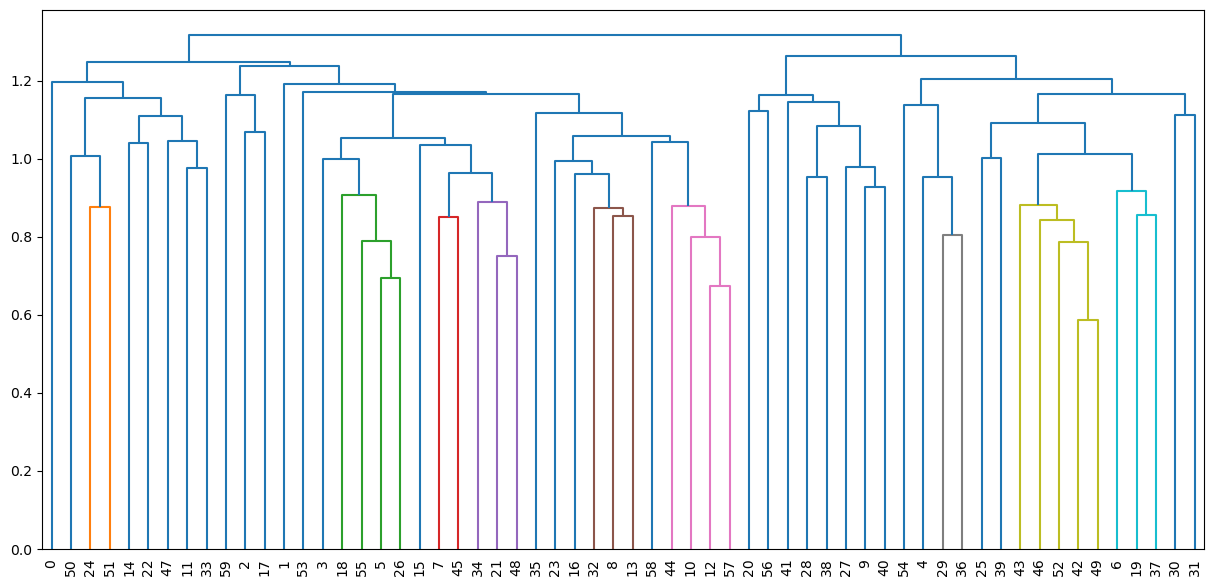

In [8]:
fig = plt.figure(figsize=(15, 7))
dendrogram_figure = dendrogram(mergings, leaf_rotation=90, leaf_font_size=10)